In [11]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def area_finder(height1, height2, width):
    area = (height1)*(width)*(1/2) + (height2*width)
    return area

In [13]:
a = 198
b = 95
c = 22
print(area_finder(a, b, c))
print(area_finder(a, b, c) - b*c)

4268.0
2178.0


In [14]:
4268-2178, 3526-1398

(2090, 2128)

## ------

In [79]:
# ha_list = [('8133-12705', 0.130943), ('8256-12704', 0.12611), ('8616-3703', 0.135063),
#              ('8720-12702', 0.134953), ('8721-3701', 0.118101)]
# #('8137-9101', 0.118865),

# ha_list_uncertain = ['8155-6103(?)', '8254-6103(?)', '8338-12705(?)', '8606-12704(?)']

# ha_list2 = [('7815-6103', 0.135043), ('7991-12705', 0.113153), ('7992-9102', 0.119399), ('8132-6101', 0.129403),
#              ('8132-12703', 0.116056), ('8133-12704', 0.134471), ('8137-3702', 0.131997),
#              ('8143-6101', 0.126168), ('8244-12704', 0.115137), ('8318-6102', 0.12908), ('8329-6102', 0.142887),
#              ('8439-3703', 0.138619), ('8448-3703', 0.138746), ('8464-6101', 0.125582), ('9049-1901', 0.131457)]

# obj1_43214 = [('8135-1902', 0.117997)]

# ha_list2_uncertain = ['8454-6102(?)', '8552-9102(?)', '8717-1902(?)']

problems = [('7991-12705', 0.113153), ('8132-6101', 0.129403), ('8244-12704', 0.115137)]

ha_list = [('8133-12705', 0.130943), ('8256-12704', 0.12611), ('8616-3703', 0.135063), ('8720-12702', 0.134953), 
           ('8721-3701', 0.118101), ('7815-6103', 0.135043), ('7992-9102', 0.119399), ('8132-12703', 0.116056), 
           ('8133-12704', 0.134471), ('8137-3702', 0.131997), ('8143-6101', 0.126168),  ('8318-6102', 0.12908), 
           ('8329-6102', 0.142887), ('8439-3703', 0.138619), ('8448-3703', 0.138746), ('8464-6101', 0.125582), 
           ('9049-1901', 0.131457)]

In [80]:
def Mpc_to_cm(Mpc):
    return Mpc * 3.08568*(10**24)

def luminosity_calc(luminosity_distance, fluxarea):
    return 4 * np.pi * (luminosity_distance**2) * fluxarea * (1e-17)

In [81]:
ha_lum_dist = [615.1, 590.5, 636.1, 635.6, 550.2, 636.0, 556.7, 539.9, 633.1, 620.5, 590.8, 605.6, 676.3, 654.3, 
               655.0, 587.9, 617.7]
ha_lum_dist_problems = [525.4, 607.3, 535.3]

In [82]:
# csv_input = pd.read_csv('ha_list.csv')
# csv_input['D_L Mpc'] = ha_lum_dist
# csv_input.to_csv('ha_list.csv', index=False)

In [84]:
ha_table_1 = pd.read_csv('ha_list.csv')
# ha_table_1

In [85]:
lum_dist = ha_table_1['D_L Mpc']
flux = ha_table_1['flux']

lum_dist_cm = []
luminosity = []

for i in range(len(lum_dist)):
    lum_dist_cm.append(Mpc_to_cm(lum_dist[i]))
    luminosity.append(luminosity_calc(Mpc_to_cm(lum_dist[i]), flux[i]))

In [86]:
# csv_input = pd.read_csv('ha_list.csv')
# csv_input['D_L cm'] = lum_dist_cm
# csv_input.to_csv('ha_list.csv', index=False)

In [87]:
# csv_input = pd.read_csv('ha_list.csv')
# csv_input['L erg/s'] = luminosity
# csv_input.to_csv('ha_list.csv', index=False)

In [88]:
# ha_table_1

# DAP -- Table 1

In [89]:
DAP = pd.read_csv('/Users/natachaupra/Desktop/Snr_Prj/Snr-Prj/Data/DAP.csv', sep=',')

In [90]:
DAP1 = DAP.copy()

In [91]:
# for i in ha_list:
#     print(DAP.loc[DAP['plateifu'] == i[0]])

In [92]:
idx = [24, 49, 120, 134, 138, 3, 8, 19, 23, 31, 34, 54, 58, 67, 73, 84, 165]
idx_problem = [6, 21, 42]
given_lum_dist = []
for i in range(len(ha_list)):
    given_lum_dist.append((DAP.loc[DAP['plateifu'] == ha_list[i][0]])['ldist_nsa_z'][idx[i]])

In [94]:
# csv_input = pd.read_csv('ha_list.csv')
# csv_input['Given D_L Mpc'] = given_lum_dist
# csv_input.to_csv('ha_list.csv', index=False)
# ha_table_1 = pd.read_csv('ha_list.csv')

In [35]:
# ha_table_1

In [36]:
# ha_table_1.rename(columns = {'Given L erg/s':'Given D_L Mpc'}, inplace = True)

In [95]:
given_flux = []
for i in range(len(ha_list)):
    given_flux.append((DAP.loc[DAP['plateifu'] == ha_list[i][0]])['emline_sflux_tot_ha_6564'][idx[i]])

In [97]:
# csv_input = pd.read_csv('ha_list.csv')
# csv_input['Given flux'] = given_flux
# csv_input.to_csv('ha_list.csv', index=False)
# ha_table_1 = pd.read_csv('ha_list.csv')
# ha_table_1

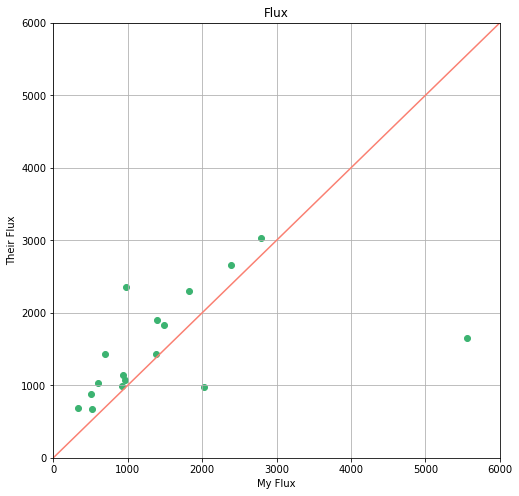

In [98]:
plt.figure(figsize = (8,8))
plt.grid()
plt.xlim(0,6000)
plt.ylim(0,6000)
plt.xlabel('My Flux')
plt.ylabel('Their Flux')
plt.title('Flux')
plt.plot([0,6000], [0,6000], color = 'salmon')
plt.scatter(ha_table_1['flux'], ha_table_1['Given flux'], color = 'mediumseagreen')

In [99]:
their_lum = []
for i in range(len(idx)):
    their_lum.append(luminosity_calc(ha_table_1['D_L cm'][i], ha_table_1['Given flux'][i]))

In [131]:
# csv_input = pd.read_csv('ha_list.csv')
# csv_input['Their Lum'] = their_lum
# csv_input.to_csv('ha_list.csv', index=False)
# ha_table_1 = pd.read_csv('ha_list.csv')
# ha_table_1

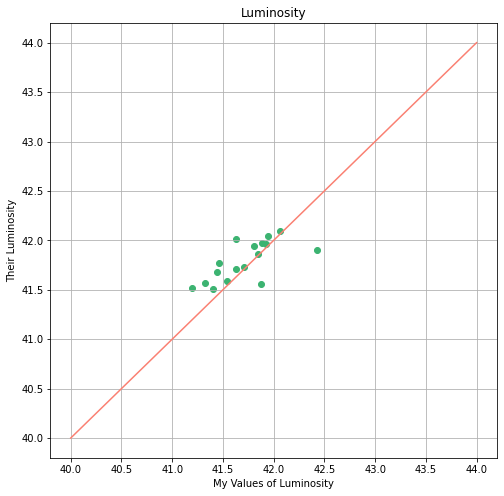

In [102]:
plt.figure(figsize = (8,8))
plt.grid()
# plt.xlim(350,650)
# plt.ylim(350,650)
plt.xlabel('My Values of Luminosity')
plt.ylabel('Their Luminosity')
plt.title('Luminosity')
plt.plot([40,44], [40,44], color = 'salmon')
plt.scatter(np.log10(ha_table_1['L erg/s']), np.log10(ha_table_1['Their Lum']), color = 'mediumseagreen')

$$ M_{BH} = \big(2.0^{+0.4}_{-0.3}\big) \times 10^6 \bigg(\frac{L_{H_\alpha}}{10^{42} erg s^{-1}}\bigg)^{0.55 \pm 0.02} \times \bigg(\frac{FWHM_{H_\alpha}}{10^3 kms^{-1}}\bigg)^{2.06 \pm 0.06} M_\odot$$

In [127]:
M_BH = np.array((2) * (10**6) * (ha_table_1['L erg/s'] / 10**42)**(0.55) * (ha_table_1['FWHM km/s'] / 10**3)**2.06)

In [128]:
log_mbh = [np.log10(i) for i in M_BH]

In [130]:
# csv_input = pd.read_csv('ha_list.csv')
# csv_input['log10 (M_BH / M_sun)'] = log_mbh
# csv_input.to_csv('ha_list.csv', index=False)
# ha_table_1 = pd.read_csv('ha_list.csv')
ha_table_1

,mangaid,plateifu,nsa_z,flux,FWHM km/s,D_L Mpc,D_L cm,L erg/s,Given D_L Mpc,Given flux,Their Lum,log10 M_BH / M_sun
0,1-377841,8133-12705,0.130943,934.712571,128.518385,615.1,1.898002e+27,4.231372e+41,430.5657,1138.4650,5.153743e+41,4.260063
1,1-558912,8256-12704,0.126110,504.760943,163.529811,590.5,1.822094e+27,2.105897e+41,413.3847,880.6425,3.674101e+41,4.308930
2,1-180308,8616-3703,0.135063,5559.944176,490.239950,636.1,1.962801e+27,2.691738e+42,445.2860,1656.7860,8.021006e+41,5.899790
3,1-351719,8720-12702,0.134953,526.323773,181.560194,635.6,1.961258e+27,2.544090e+41,444.8922,668.3733,3.230714e+41,4.447655
4,1-47511,8721-3701,0.118101,957.464724,159.712334,550.2,1.697741e+27,3.467972e+41,385.1212,1069.3070,3.873069e+41,4.406949
5,1-113521,7815-6103,0.135043,1823.267326,132.639932,636.0,1.962492e+27,8.824218e+41,445.2144,2307.7280,1.116890e+42,4.463861
6,1-22948,7992-9102,0.119399,2028.892153,544.028962,556.7,1.717798e+27,7.523381e+41,389.6841,980.3219,3.635154e+41,5.688439
7,1-338629,8132-12703,0.116056,2390.393861,140.608608,539.9,1.665959e+27,8.336961e+41,377.9462,2656.6560,9.265601e+41,4.502489
8,1-338922,8133-12704,0.134471,329.403967,178.011876,633.1,1.953544e+27,1.579738e+41,443.1667,686.8413,3.293917e+41,4.316177
9,1-574402,8137-3702,0.131997,595.560345,181.232544,620.5,1.914664e+27,2.743601e+41,434.3250,1029.4190,4.742282e+41,4.464073


Carroll and Ostlie 

$$ M_{BH} = (1.66 \pm 0.24) \times 10^8 M_\odot \times \Big(\frac{\sigma}{200 kms^{-1}}\Big)^{4.86 \pm 0.43} $$ 

In [140]:
given_vdis = []
for i in range(len(ha_list)):
    given_vdis.append(DAP.loc[DAP['plateifu'] == ha_list[i][0]]['stellar_sigma_1re'][idx[i]])

In [145]:
# csv_input = pd.read_csv('ha_list.csv')
# csv_input['Given vdis'] = given_vdis
# csv_input.to_csv('ha_list.csv', index=False)
ha_table_1 = pd.read_csv('ha_list.csv')
# ha_table_1

In [153]:
a = 1.66 * 10**8
b = 4.86
M_BH_Carroll_Ostlie = np.log10(a * (np.array(given_vdis)/200)**b)
M_BH_Carroll_Ostlie

array([7.0537395 , 8.5797877 , 7.62754242, 7.61198115, 7.65368157,
       6.85181845, 7.39895027, 7.23510772, 8.26493012, 7.41422735,
       8.44951466, 7.96119917, 7.79098563, 7.38937027, 7.99447727,
       9.47929719, 7.25724292])

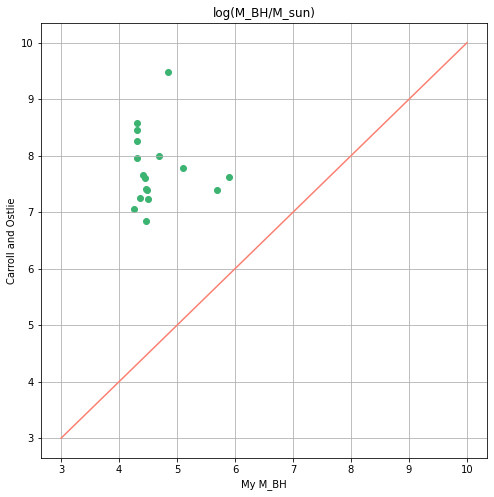

In [159]:
plt.figure(figsize = (8,8))
plt.grid()
# plt.xlim(350,650)
# plt.ylim(350,650)
plt.xlabel('My M_BH')
plt.ylabel('Carroll and Ostlie')
plt.title('log(M_BH/M_sun)')
plt.plot([3,10], [3,10], color = 'salmon')
plt.scatter(ha_table_1['log10 M_BH / M_sun'], M_BH_Carroll_Ostlie, color = 'mediumseagreen')